Start with our usual setup, including the utility methods from last time.

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# provide methods for loading and displaying images
def load(image_path):
    out = io.imread(image_path)
    out = out.astype(np.float64) / 255
    return out

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# As usual, you may use your own images, but you must include them in your submission.
image_path = './dog.jpg'

image = load(image_path)

We provide a naive implementation of a grayscale convolutional filter:

In [2]:
import math
def naive_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    out = np.zeros(image.shape)
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            output_value = 0
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):
                        image_value = 0
                    else:
                        image_value = image[image_row + image_row_offset, image_column + image_column_offset]

                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value
            
    return out

## Exercise 1

1. Take a look at the filters in the following code cell. What do you think they do? You may want to run display() on the filter to visualize it.
2. Run the filters using `naive_convolution_filter` to verify your answer.

In [3]:
filter1 = np.array(
[
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

filter2 = np.array(
[
    [0,0,0],
    [0,2,0],
    [0,0,0]
])

# Hint: check the lecture slides for a familiar-looking filter
filter3 = np.array(
[
    [-.11,-.11,-.11],
    [-.11,1.88,-.11],
    [-.11,-.11,-.11],
])


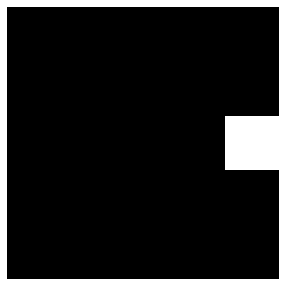

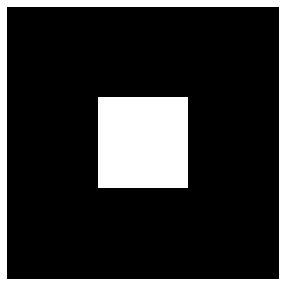

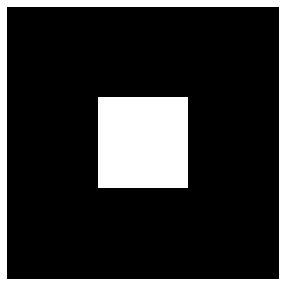

In [4]:
display(filter1)
display(filter2)
display(filter3)

1. I think the first filter will shift the image by two pixels, the second will double the brightness, and the third will heighten the difference between it and surrounding pixels.

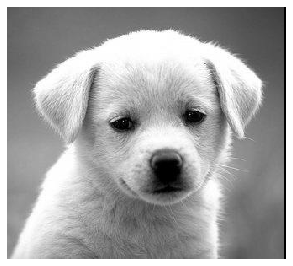

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


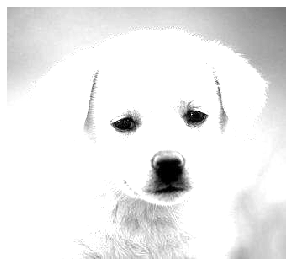

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


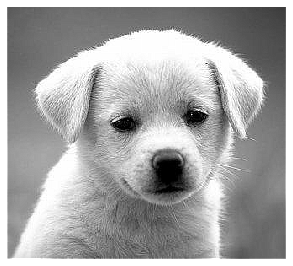

In [5]:
display(naive_convolution_filter(image, filter1))
display(naive_convolution_filter(image, filter2))
display(naive_convolution_filter(image, filter3))

2. It looks like the first filter did shift the image, the second did brighten, and the third sharpened the image?

## Exercise 2
So far, we've only run the naive implementation on a grayscale image. Add a color image of your choice and run a filter on it, showing both the original image and the output of the filter.

As you can see, the filter runs on all three channels. Create an implementation that allows applying different filters to each channel, and submit the output of using at least two different filters on the same image.

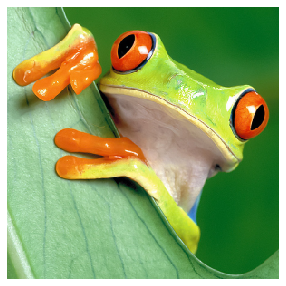

In [7]:
image2 = load("./redeyedtreefrog.png")
display(image2)

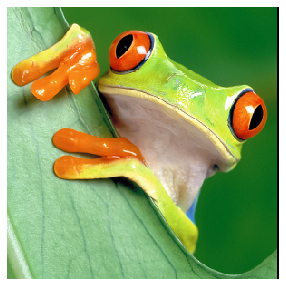

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


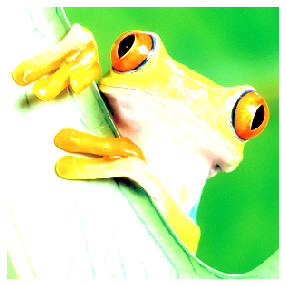

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


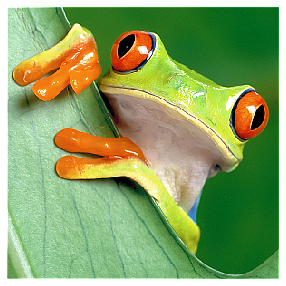

In [7]:
display(naive_convolution_filter(image2, filter1))
display(naive_convolution_filter(image2, filter2))
display(naive_convolution_filter(image2, filter3))

## Exercise 3
Create your own filter(s) and describe their output.

In [13]:
# Gaussian blur, looks smoother than a box blur
filter4 = np.array(
[
    [1/256,4/256,6/256,4/256,1/256],
    [4/256,16/256,24/256,16/256,4/256],
    [6/256,24/256,36/256,24/256,6/256],
    [4/256,16/256,24/256,16/256,4/256],
    [1/256,4/256,6/256,4/256,1/256]
])
# Emboss filter
filter5 = np.array(
[
    [1,0.0,0,0.0,0.0],
    [0.0,1,0,0.0,0.0],
    [0,0,1,0,0],
    [0.0,0.0,0,-1,0.0],
    [0.0,0.0,0,0.0,-1]
])
# Big box blur
filter6 = np.zeros((31,31))
filter6[:,:] = 1/(31**2)

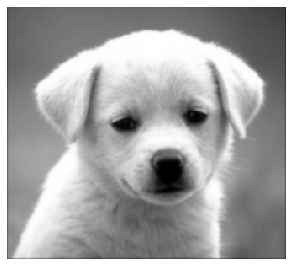

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


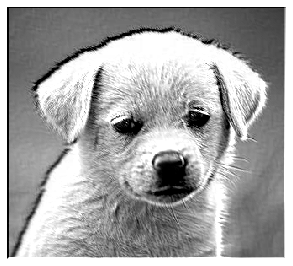

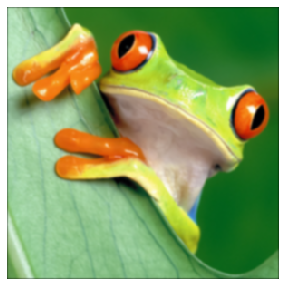

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


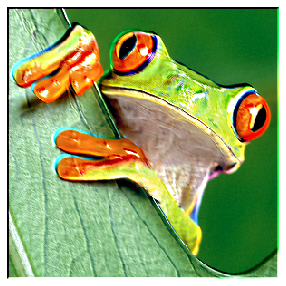

In [9]:
display(naive_convolution_filter(image, filter4))
display(naive_convolution_filter(image, filter5))
display(naive_convolution_filter(image2, filter4))
display(naive_convolution_filter(image2, filter5))

## Advanced exercise 1

Recall from lecture that at the edges, filters only partially overlap with the image pixels, so we need a way to provide numbers that are out of bounds. The provided implementation uses the strategy we discussed in lecture, zero-padding, which just treats all out-of-bounds pixels as zero.

A different strategy is edge value replication: treat all out-of-bounds pixels as having the same value as the closest in-bounds pixel. Another one is mirror extension: treat the border of the image as a mirror, and use the pixel value that would be reflected into the out-of-bounds space. These are not the only strategies -- you're welcome to research others on your own.

Modify naive_convolutional_filter to implement one or more of these strategies. How does that change the output of filters?

In [61]:
def edge_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    out = np.zeros(image.shape)

    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            output_value = 0
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    temp_row = image_row + image_row_offset
                    temp_col = image_column + image_column_offset
                    
                    if temp_row < 0:
                        temp_row = 0
                    if temp_row >= image.shape[0]:
                        temp_row = image.shape[0]-1
                    if temp_col < 0:
                        temp_col = 0
                    if temp_col >= image.shape[1]:
                        temp_col = image.shape[1]-1
                    
                    image_value = image[temp_row, temp_col]

                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value
            
    return out

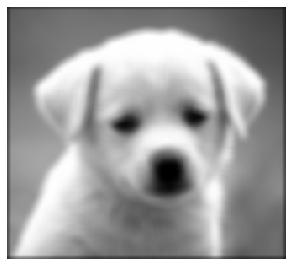

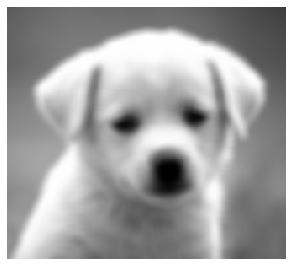

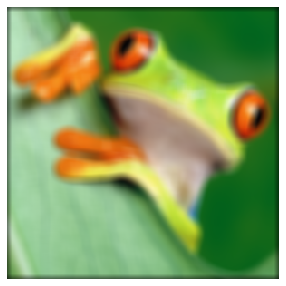

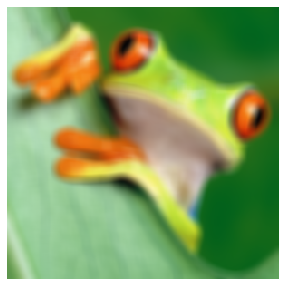

In [64]:
display(naive_convolution_filter(image, filter6))
display(edge_convolution_filter(image, filter6))
display(naive_convolution_filter(image2, filter6))
display(edge_convolution_filter(image2, filter6))

## Advanced exercise 2

You may have noticed that `naive_convolutional_filter` is quite slow. Create an implementation that is faster, using the `time` library to demonstrate the difference in performance. Your implementation must return the same output as the naive implementation.


In [5]:
def fast_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    out = np.zeros(image.shape)
    half_kernel = kernel.shape[0]//2
    image_pad = np.pad(image, ((half_kernel,half_kernel),(half_kernel,half_kernel),(0,0)), mode='constant')
    if len(image.shape) > 2:
        expanded_kernel = np.repeat(np.expand_dims(kernel,axis=2), 3, axis=2)
    else:
        expanded_kernel = kernel
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            output_value = expanded_kernel*image_pad[image_row:image_row+1+(2*half_kernel), image_column:image_column+1+(2*half_kernel), :]
            out[image_row, image_column] = np.sum(np.sum(output_value, axis=0), axis=0)
            
    return out

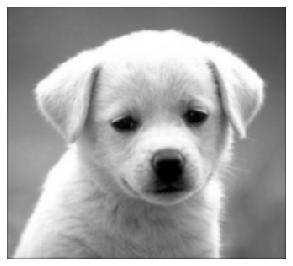

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


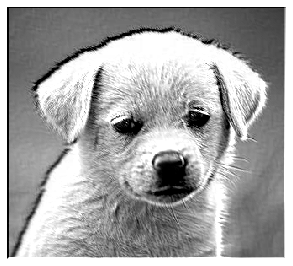

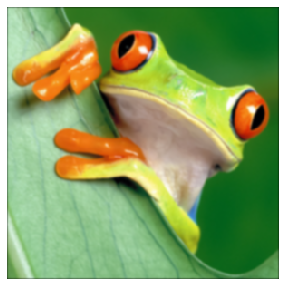

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


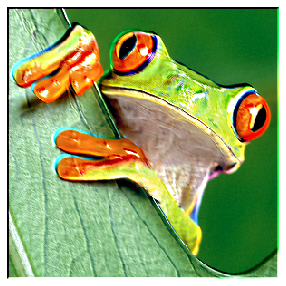

In [8]:
display(fast_convolution_filter(image, filter4))
display(fast_convolution_filter(image, filter5))
display(fast_convolution_filter(image2, filter4))
display(fast_convolution_filter(image2, filter5))

In [87]:
np.repeat(np.expand_dims(filter5, axis=2),2,axis=2)

array([[[ 1.,  1.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 1.,  1.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 1.,  1.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [-1., -1.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [-1., -1.]]])

In [9]:
import time
start = time.process_time()
naive_convolution_filter(image, filter4)  # 5x5 gaussian blur
end = time.process_time()
print(end - start)
start = time.process_time()
fast_convolution_filter(image, filter4)
end = time.process_time()
print(end - start)
start = time.process_time()
naive_convolution_filter(image2, filter4)
end = time.process_time()
print(end - start)
start = time.process_time()
fast_convolution_filter(image2, filter4)
end = time.process_time()
print(end - start)

10.589659
1.7747689999999992
9.799979
1.5815669999999997


In [12]:
import time
start = time.process_time()
naive_convolution_filter(image, filter6)  # 13x13 box blur
end = time.process_time()
print(end - start)
start = time.process_time()
fast_convolution_filter(image, filter6)
end = time.process_time()
print(end - start)
start = time.process_time()
naive_convolution_filter(image2, filter6)
end = time.process_time()
print(end - start)
start = time.process_time()
fast_convolution_filter(image2, filter6)
end = time.process_time()
print(end - start)

67.25976
1.4840059999999937
60.689936
1.3506690000000106


In [14]:
import time
start = time.process_time()
naive_convolution_filter(image, filter6)  # 31x31 box blur
end = time.process_time()
print(end - start)
start = time.process_time()
fast_convolution_filter(image, filter6)
end = time.process_time()
print(end - start)
start = time.process_time()
naive_convolution_filter(image2, filter6)
end = time.process_time()
print(end - start)
start = time.process_time()
fast_convolution_filter(image2, filter6)
end = time.process_time()
print(end - start)

376.49960999999996
1.8643680000000131
329.70616399999994
1.6595530000000736
